In [1]:
import  pandas as pd 

In [2]:
trans=pd.read_csv("Retail_Data_Transactions.csv")
trans

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [3]:
res=pd.read_csv("Retail_Data_Response.csv")
res

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [22]:
df=pd.merge(res,trans,on="customer_id",how="left")
df

,customer_id,response,trans_date,tran_amount
0,CS1112,0,14-Jan-15,39
1,CS1112,0,16-Jul-14,90
2,CS1112,0,29-Apr-14,63
3,CS1112,0,04-Dec-14,59
4,CS1112,0,08-Apr-12,56
...,...,...,...,...
124964,CS9000,0,12-May-12,53
124965,CS9000,0,08-May-14,20
124966,CS9000,0,28-Feb-15,34
124967,CS9000,0,01-Jun-12,37


In [31]:
df.dtypes

customer_id    object
response        int64
trans_date     object
tran_amount     int64
dtype: object

In [32]:
df.shape

(124969, 4)

In [33]:
df.head(10)

,customer_id,response,trans_date,tran_amount
0,CS1112,0,14-Jan-15,39
1,CS1112,0,16-Jul-14,90
2,CS1112,0,29-Apr-14,63
3,CS1112,0,04-Dec-14,59
4,CS1112,0,08-Apr-12,56
5,CS1112,0,15-Dec-12,76
6,CS1112,0,01-Jul-13,36
7,CS1112,0,03-Jul-12,81
8,CS1112,0,02-Oct-11,60
9,CS1112,0,13-Nov-13,71


In [34]:
df.tail(10)

,customer_id,response,trans_date,tran_amount
124959,CS9000,0,08-Jul-14,26
124960,CS9000,0,23-Oct-11,23
124961,CS9000,0,04-Sep-11,16
124962,CS9000,0,23-May-12,77
124963,CS9000,0,01-Oct-13,71
124964,CS9000,0,12-May-12,53
124965,CS9000,0,08-May-14,20
124966,CS9000,0,28-Feb-15,34
124967,CS9000,0,01-Jun-12,37
124968,CS9000,0,11-Dec-12,49


In [35]:
df.describe()

,response,tran_amount
count,124969.000000,124969.000000
mean,0.110763,64.995143
std,0.313840,22.860059
min,0.000000,10.000000
25%,0.000000,47.000000
50%,0.000000,65.000000
75%,0.000000,83.000000
max,1.000000,105.000000


In [36]:
df.isnull().sum()

customer_id    0
response       0
trans_date     0
tran_amount    0
dtype: int64

In [43]:
import seaborn as sns

<Axes: >

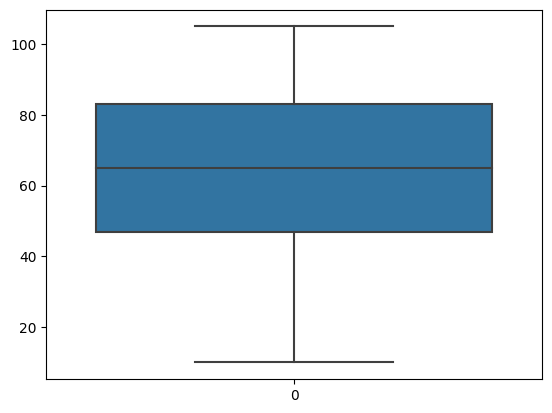

In [68]:
sns.boxplot(df["tran_amount"])

In [98]:
df['month']=df["trans_date"].dt.month
df

,customer_id,response,trans_date,tran_amount,month
0,CS1112,0,2015-01-14,39,1
1,CS1112,0,2014-07-16,90,7
2,CS1112,0,2014-04-29,63,4
3,CS1112,0,2014-12-04,59,12
4,CS1112,0,2012-04-08,56,4
...,...,...,...,...,...
124964,CS9000,0,2012-05-12,53,5
124965,CS9000,0,2014-05-08,20,5
124966,CS9000,0,2015-02-28,34,2
124967,CS9000,0,2012-06-01,37,6


In [95]:
df["trans_date"]=pd.to_datetime(df["trans_date"])

C:\Users\shubh\AppData\Local\Temp\ipykernel_3640\1956831075.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["trans_date"]=pd.to_datetime(df["trans_date"])


In [97]:
df.dtypes

customer_id            object
response                int64
trans_date     datetime64[ns]
tran_amount             int64
dtype: object

In [100]:
sales=df.groupby("month")["tran_amount"].sum()
sales=sales.sort_values(ascending=False).reset_index().head(10)
sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089
3,7,717011
4,12,709795
5,11,698024
6,6,697014
7,9,694201
8,2,645028
9,3,636475


In [106]:
counts=df["customer_id"].value_counts().reset_index()
counts

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3805,35
4,CS2620,35
...,...,...
6879,CS7224,4
6880,CS8559,4
6881,CS8504,4
6882,CS7333,4
